In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar

In [2]:
# already processed by `preprocess_temperature_data.ipynb`
dr = xr.open_dataarray('./temperature_512core_processed.nc', chunks={'time': 15})
dr

<xarray.DataArray 'temperature' (time: 225, y: 1025, x: 2049)>
dask.array<shape=(225, 1025, 2049), dtype=float64, chunksize=(15, 1025, 2049)>
Coordinates:
  * time     (time) float64 0.0 0.0001 0.0004115 0.001375 0.002375 0.003375 ...
  * y        (y) float64 0.0 2.353e-06 9.412e-06 2.118e-05 3.765e-05 ...
  * x        (x) float64 0.0 0.0009766 0.001953 0.00293 0.003906 0.004883 ...

In [3]:
dr[::40]  # only get a few time 

<xarray.DataArray 'temperature' (time: 6, y: 1025, x: 2049)>
dask.array<shape=(6, 1025, 2049), dtype=float64, chunksize=(1, 1025, 2049)>
Coordinates:
  * time     (time) float64 0.0 0.03837 0.07837 0.1184 0.1584 0.1984
  * y        (y) float64 0.0 2.353e-06 9.412e-06 2.118e-05 3.765e-05 ...
  * x        (x) float64 0.0 0.0009766 0.001953 0.00293 0.003906 0.004883 ...

CPU times: user 12.4 s, sys: 593 ms, total: 13 s
Wall time: 15.1 s


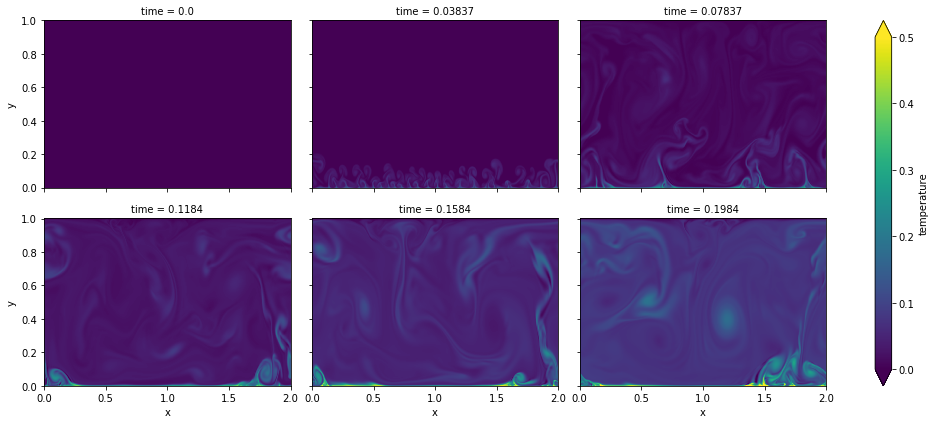

In [4]:
%%time
fig = dr[::40].plot(x='x', y='y', col='time', col_wrap=3,
                    vmin=0, vmax=0.5, size=3, aspect=1.5)
plt.savefig('Temp_evolution.png', dpi=300)